In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# Remember to use GPU!

### Load and scale the data

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/xchen793/NYU22SummerSchoolML/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/xchen793/NYU22SummerSchoolML/main/Day5/fish_market_label.csv')
X = feature.values
y = label.values

In [ ]:
# normalize the data using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
## TODO
# split the SCALED!! data in validation and train

X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.1, random_state=3)

In [ ]:
## TODO
# print the number of data samples in the training and validation data
print(f"The number of data samples in the training data is: {X_train.shape[0]}")
print(f"The number of data samples in the validation data is: {X_val.shape[0]}")

print(f"The number of features is: {X_train.shape[1]}")

The number of data samples in the training data is: 111
The number of data samples in the validation data is: 13
The number of features is: 5


### Build Model

1) Define a model of three dense layers with ReLu activation functions. The output of the two first layers should have 32 neurons. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [ ]:
## TODO
n_epochs = 2000
batch_size = 64

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse', 'mae']
) # use the Adam optimizer

# print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## TODO
# train the model (use the train data and validation data from above)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=batch_size)

Epoch 1/2000
2/2 [==============================] - 5s 302ms/step - loss: 274050.5625 - mse: 274050.5625 - mae: 398.6798 - val_loss: 176194.7812 - val_mse: 176194.7812 - val_mae: 317.3643
Epoch 2/2000
2/2 [==============================] - 0s 49ms/step - loss: 273953.4375 - mse: 273953.4375 - mae: 398.5757 - val_loss: 176131.7656 - val_mse: 176131.7656 - val_mae: 317.2765
Epoch 3/2000
2/2 [==============================] - 0s 65ms/step - loss: 273865.7812 - mse: 273865.7812 - mae: 398.4796 - val_loss: 176074.0312 - val_mse: 176074.0312 - val_mae: 317.1971
Epoch 4/2000
2/2 [==============================] - 0s 45ms/step - loss: 273784.3125 - mse: 273784.3125 - mae: 398.3898 - val_loss: 176013.2656 - val_mse: 176013.2656 - val_mae: 317.1174
Epoch 5/2000
2/2 [==============================] - 0s 95ms/step - loss: 273690.5000 - mse: 273690.5000 - mae: 398.2961 - val_loss: 175951.9219 - val_mse: 175951.9219 - val_mae: 317.0391
Epoch 6/2000
2/2 [==============================] - 0s 34ms/step

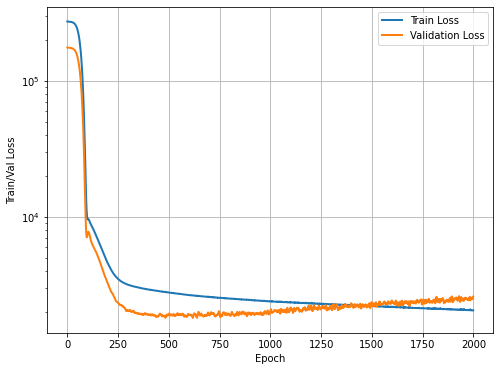

In [ ]:
## TODO
# plot the train and validation losses on the same picture
# make sure to label the axis and create a legend 
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(n_epochs), history.history['loss'], label='Train Loss', linewidth=2)
plt.semilogy(np.arange(n_epochs), history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Train/Val Loss')
plt.grid()
plt.legend()

#### Load the testing dataset

In [ ]:
X_test = pd.read_csv('https://raw.githubusercontent.com/xchen793/NYU22SummerSchoolML/main/Day5/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/xchen793/NYU22SummerSchoolML/main/Day5/fish_market_test_label.csv').values

In [ ]:
# scale the test data using the scaler above
Xtest_s = scaler.transform(X_test)

In [ ]:
## TODO
# predict the corresponding y_hat value of the test dataset (use the scaled test data)
y_hat = model.predict(Xtest_s)

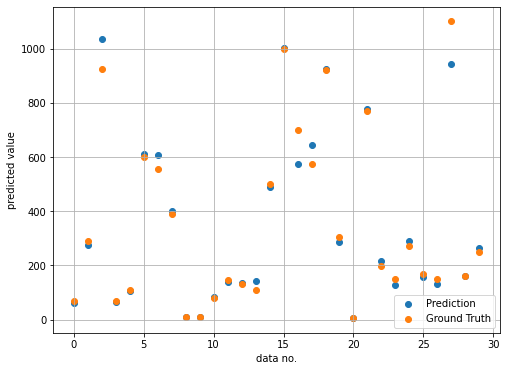

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.grid()

In [ ]:
## TODO
# print MSE, RMSE (root-mse), MAE on the train and test data
# compare these results against last week's results (when we used linear/polynimial regression)
y_hat_train = model.predict(X_train)
mse_train = np.mean((y_train - y_hat_train)**2)
rmse_train = np.sqrt(mse_train)
mae_train = np.mean(np.abs(y_train - y_hat_train))

mse_test = np.mean((y_test - y_hat)**2)
rmse_test = np.sqrt(mse_test)
mae_test = np.mean(np.abs(y_test - y_hat))

In [ ]:
print(f"The Train MSE is: {mse_train}")
print(f"The Train Root MSE is: {rmse_train}")
print(f"The Train MAE is: {mae_train}")
print('----------')
print(f"The Test MSE is: {mse_test}")
print(f"The Test Root MSE is: {rmse_test}")
print(f"The Test MAE is: {mae_test}")

The Train MSE is: 2048.463884285843
The Train Root MSE is: 45.259958951437895
The Train MAE is: 26.690287053907237
----------
The Test MSE is: 2129.926665918557
The Test Root MSE is: 46.1511285443656
The Test MAE is: 25.334872360229493
